In [9]:
import sys
sys.path.append("../../../")

import torch
import numpy as np

from experiments.assumptions.pullback_error import script
from models.supervised.mlp.model import MLP
from models.data.sklearn_datasets import MoonDataset, BlobsDataset, SpiralDataset, CirclesDataset
from models.data.regression_datasets import SinusoidalRegression
models_path = "../../../models/supervised/mlp/saved_models"

# We want to measure the error from using the pullback metric instead of computing the Riemannian
# metric for each layer.

# We will use the Moon dataset for this experiment and the cosine function to measure the 
# between the two given metrics are scale-invariant.

In [10]:
np.random.seed(2)
torch.manual_seed(2)

In [12]:
mode = 'circles'
size = "skinny"
if mode == 'moon':
    dataset = MoonDataset(n_samples=1000, noise=0.01)
elif mode == 'blobs':
    dataset = BlobsDataset(n_samples=1000, noise=0.01)
elif mode == 'spiral':
    dataset = SpiralDataset(n_samples=1000, noise=0.01)
elif mode == 'circles':
    dataset = CirclesDataset(n_samples=1000, noise=0.01)


if size == "skinny":
    model = MLP(2,7,2,2)
    model.load_state_dict(torch.load(f'{models_path}/2_wide/mlp_{mode}/model_199.pth'))
else:
    model = MLP(2,7,10,2)
    model.load_state_dict(torch.load(f'{models_path}/vanilla/mlp_{mode}/model_199.pth'))

In [ ]:
script.plot_riemann_metric_local(model, dataset.X, dataset.y, f"{mode}_{size}", N=50)
script.plot_riemann_metric_pullback(model, dataset.X, dataset.y, f"{mode}_{size}", N=50)

In [5]:
model.forward(torch.from_numpy(dataset.X).float(), save_activations=True)
activations = [output.detach().numpy() for output in model.activations]
N = 50

In [6]:
g = script.iter_riemann_comp(model, activations, N=50)
g_2 = script.pullback_riemann_comp(model, activations, N=50)

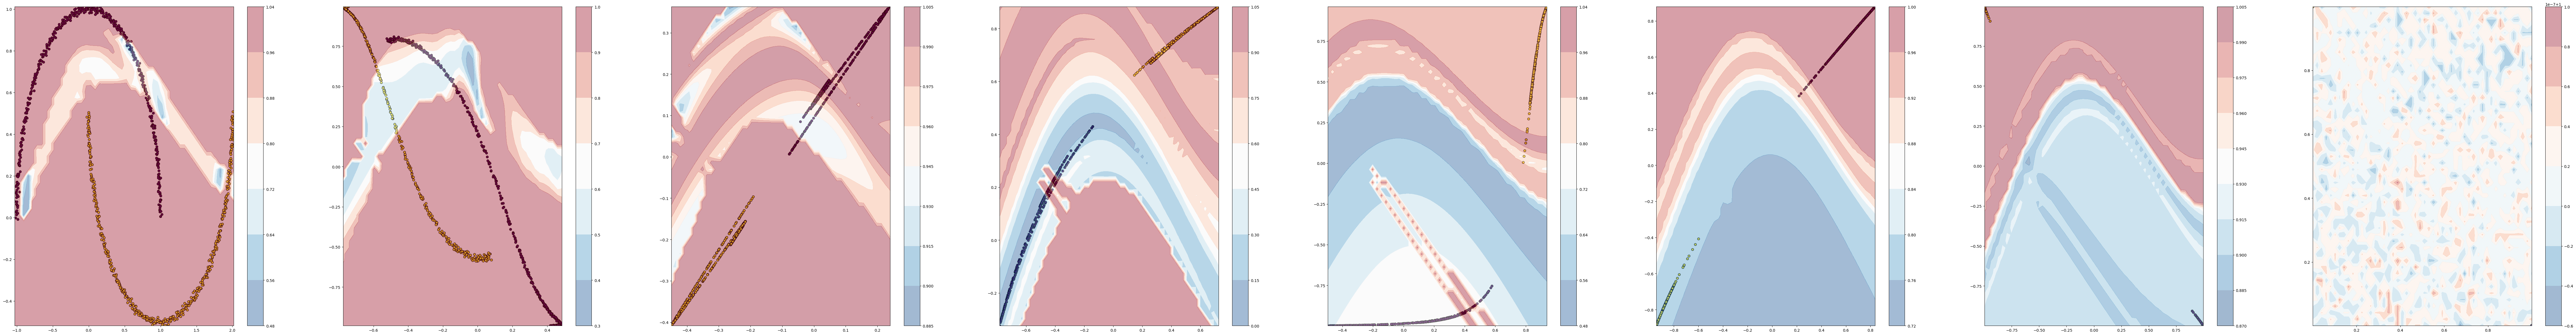

In [13]:
cosine_similarity = script.compute_cosine_score(g, g_2)
script.violin_plot(cosine_scores=cosine_similarity, save_name=f"{mode}_{size}")
script.plot_err_heatmap(cosine_scores=cosine_similarity, model=model, dataset=dataset, save_name=f"{mode}_{size}", N=50)